# Exploratory Data Analysis - Terrorism

## Author: Muskan Jain

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Observing Dataset

In [2]:
df=pd.read_csv("C:\\Users\\91741\\Downloads\\Base for Analysis.csv",encoding="latin-1")
df.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,nperps,claimed,weaptype1_txt,nkill,nkillter,nwound,propextent_txt,ishostkid,ransom,nreleased
0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN
1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN
2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,...,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor (likely < $1 million),0.0,0.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          201183 non-null  int64  
 1   iyear            201183 non-null  int64  
 2   imonth           201183 non-null  int64  
 3   iday             201183 non-null  int64  
 4   extended         201183 non-null  int64  
 5   country_txt      201183 non-null  object 
 6   region_txt       201183 non-null  object 
 7   city             200757 non-null  object 
 8   latitude         196556 non-null  float64
 9   longitude        196555 non-null  float64
 10  vicinity         201183 non-null  int64  
 11  crit1            201183 non-null  int64  
 12  multiple         201183 non-null  int64  
 13  success          201183 non-null  int64  
 14  suicide          201183 non-null  int64  
 15  attacktype1_txt  201183 non-null  object 
 16  targtype1_txt    201183 non-null  obje

In [4]:
df.shape

(201183, 29)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt',
       'region_txt', 'city', 'latitude', 'longitude', 'vicinity', 'crit1',
       'multiple', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'natlty1_txt', 'gname', 'nperps', 'claimed', 'weaptype1_txt', 'nkill',
       'nkillter', 'nwound', 'propextent_txt', 'ishostkid', 'ransom',
       'nreleased'],
      dtype='object')

# Data Preprocessing

## Important Columns 

In [6]:
df=df[["iyear","imonth","iday","country_txt","region_txt","city",
       "latitude","longitude","attacktype1_txt","targtype1_txt",
       "gname","weaptype1_txt","nkill","nwound"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
1,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
2,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
3,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN
4,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,Black Nationalists,Firearms,0.0,0.0


In [7]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","city":"City",
                   "latitude":"Latitude","longitude":"Longitude",
                  "attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded"},inplace=True)

In [8]:
df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attack Type,Target Type,Group Name,Weapon Type,Killed,Wounded
0,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
1,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
2,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
3,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN
4,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,Black Nationalists,Firearms,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         201183 non-null  int64  
 1   Month        201183 non-null  int64  
 2   Day          201183 non-null  int64  
 3   Country      201183 non-null  object 
 4   Region       201183 non-null  object 
 5   City         200757 non-null  object 
 6   Latitude     196556 non-null  float64
 7   Longitude    196555 non-null  float64
 8   Attack Type  201183 non-null  object 
 9   Target Type  201183 non-null  object 
 10  Group Name   201183 non-null  object 
 11  Weapon Type  201183 non-null  object 
 12  Killed       189233 non-null  float64
 13  Wounded      182259 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 21.5+ MB


In [10]:
df.shape

(201183, 14)

In [11]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             426
Latitude        4627
Longitude       4628
Attack Type        0
Target Type        0
Group Name         0
Weapon Type        0
Killed         11950
Wounded        18924
dtype: int64

# Handling Missing values

In [12]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)

In [13]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,201183.000000,201183.000000,201183.000000,196556.000000,196555.000000,201183.000000,201183.000000
mean,2004.158478,6.451678,15.520983,23.356215,29.784881,2.267831,2.831964
std,13.429481,3.387376,8.808477,18.224189,56.602962,10.927856,39.728346
min,1970.000000,0.000000,0.000000,-53.154613,-176.176447,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.506724,8.644191,0.000000,0.000000
50%,2011.000000,6.000000,15.000000,31.250196,43.659053,0.000000,0.000000
75%,2015.000000,9.000000,23.000000,34.558524,68.810806,2.000000,2.000000
max,2019.000000,12.000000,31.000000,74.633553,179.366667,1570.000000,10878.000000


## Visualizing the data

### 1. Year wise Attacks

In [14]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


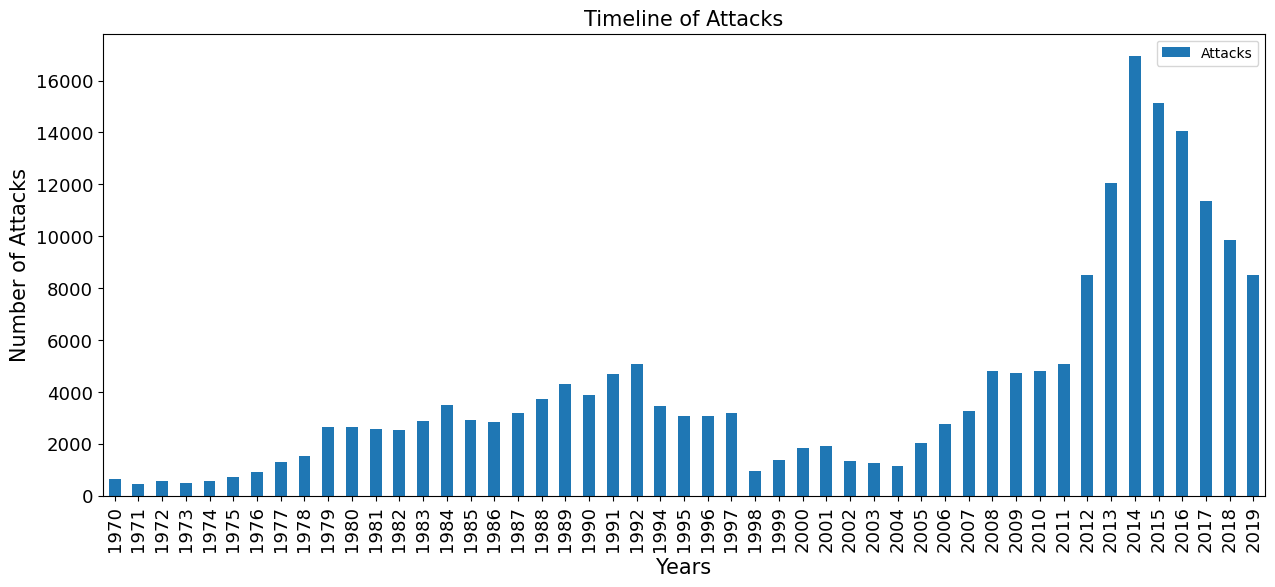

In [15]:
attacks.plot(kind="bar",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

## Most number of attacks happened in 2014

## 2. Killed per year

In [16]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


Text(0, 0.5, 'Number of People Killed')

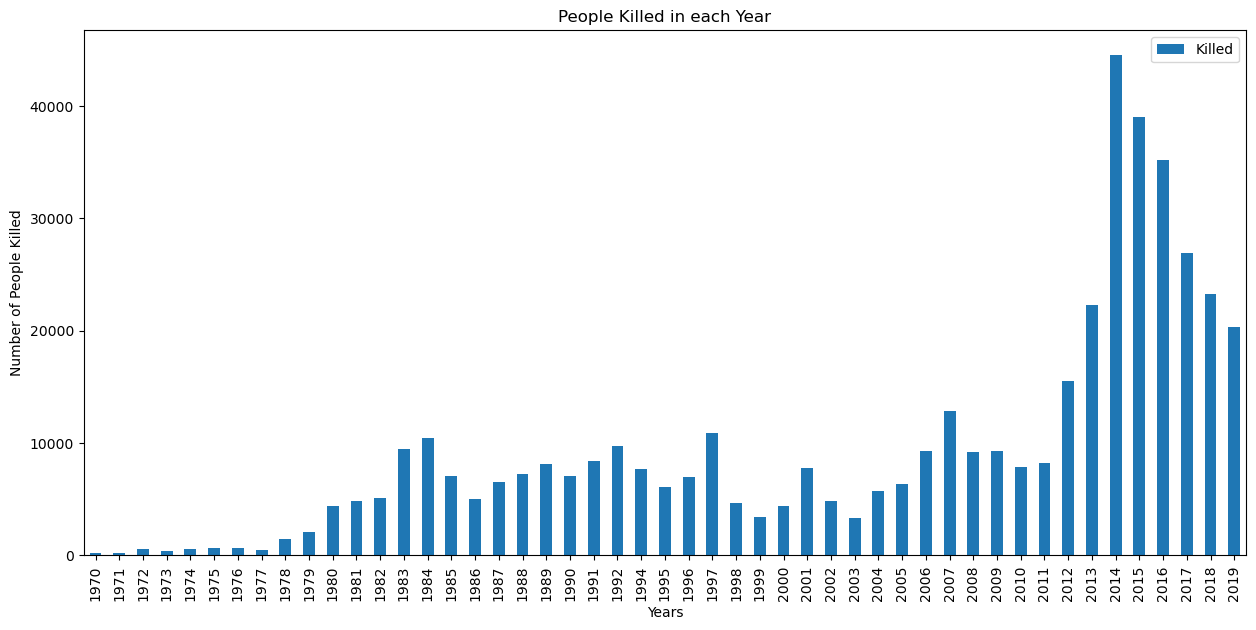

In [17]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)

#Killed
yk.plot(kind="bar",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

###  Most people killed in 2014

# 3. Wounded per year

In [18]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


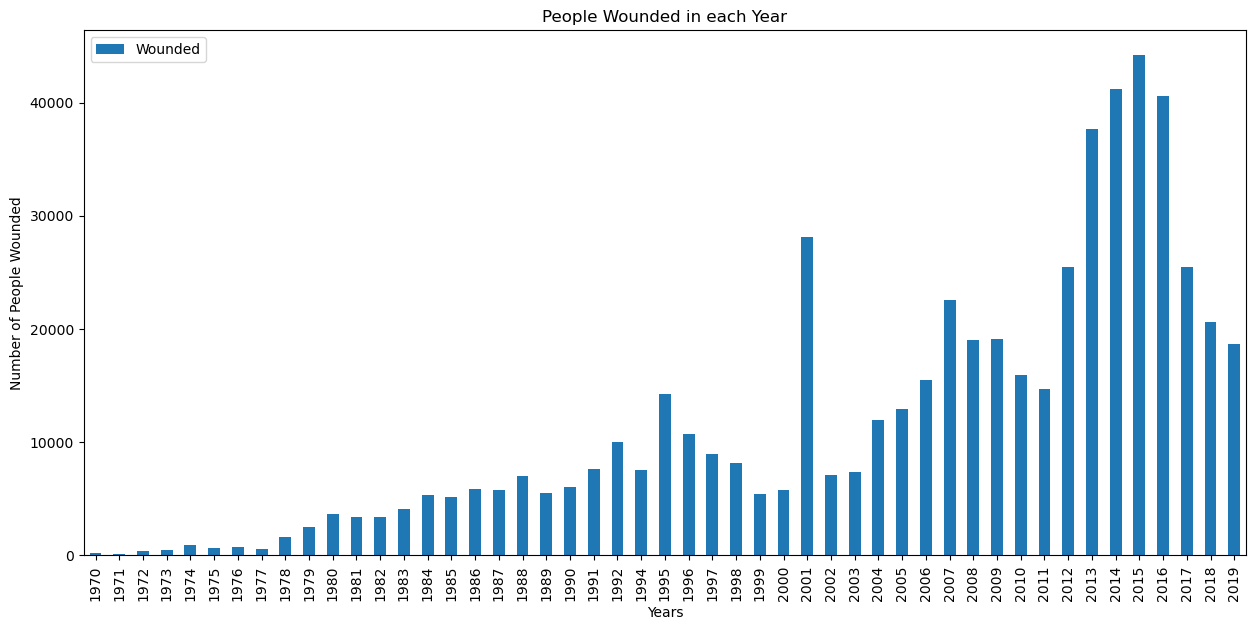

In [19]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,2)

#Wounded
yw.plot(kind="bar",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

###  Most people wounded in 2014

# 2. Region wise Attacks

In [25]:
region=pd.crosstab(df.Year,df.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


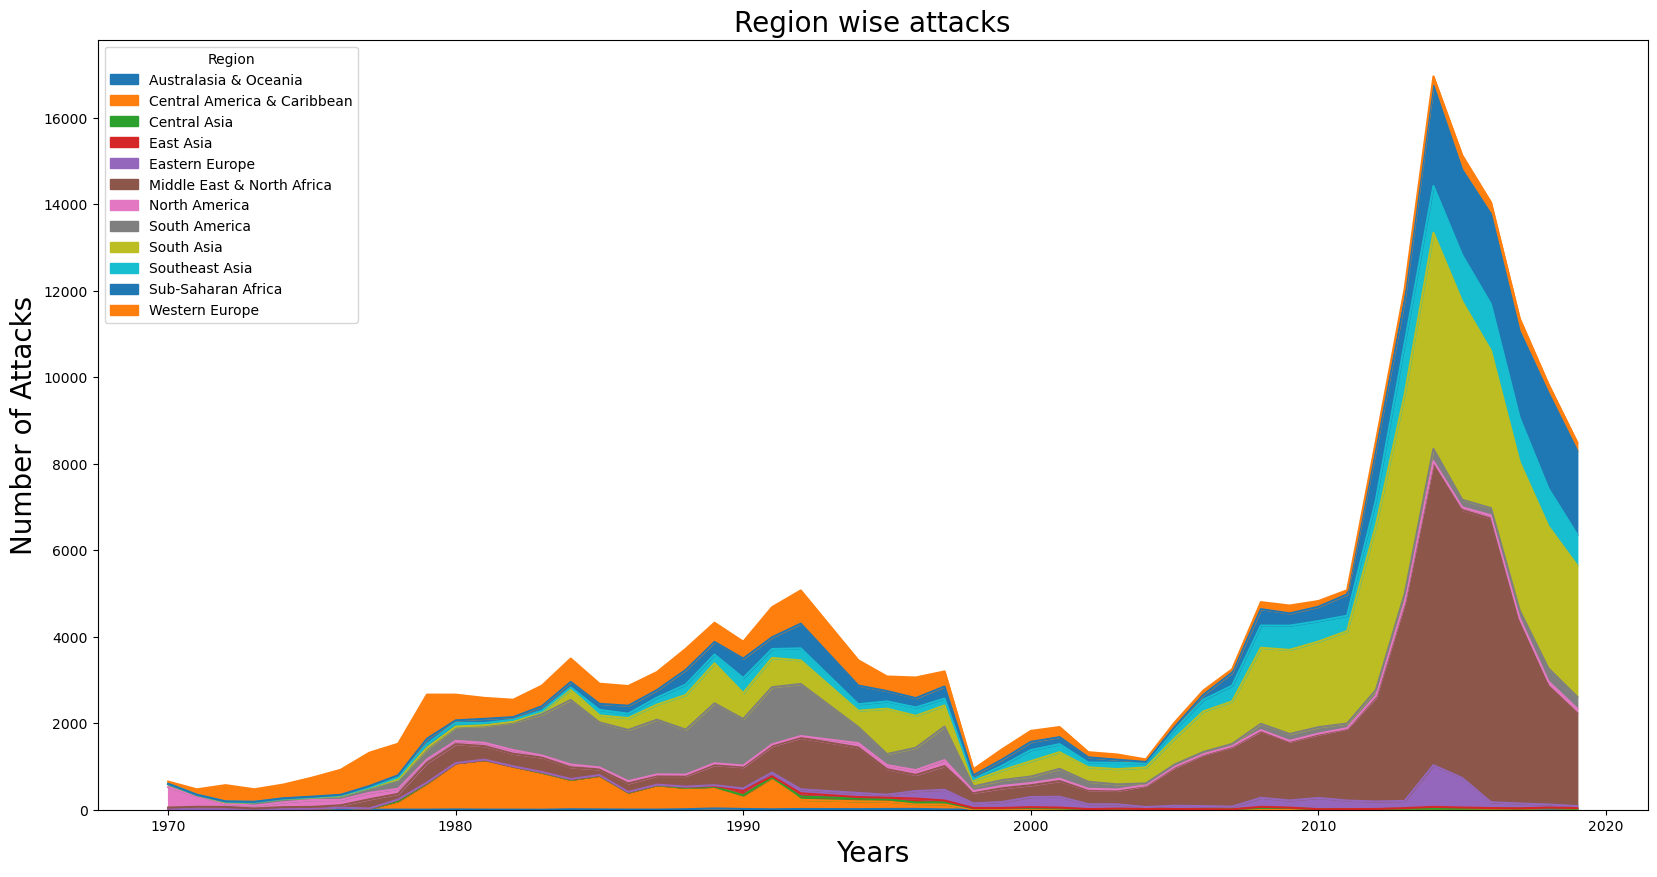

In [26]:
region.plot(kind='area',figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [23]:
regt=region.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     56414
South Asia                     51301
Sub-Saharan Africa             21742
South America                  19572
Western Europe                 17033
Southeast Asia                 14079
Central America & Caribbean    10374
Eastern Europe                  5266
North America                   3698
East Asia                        825
Central Asia                     574
Australasia & Oceania            305
Name: Total, dtype: int64

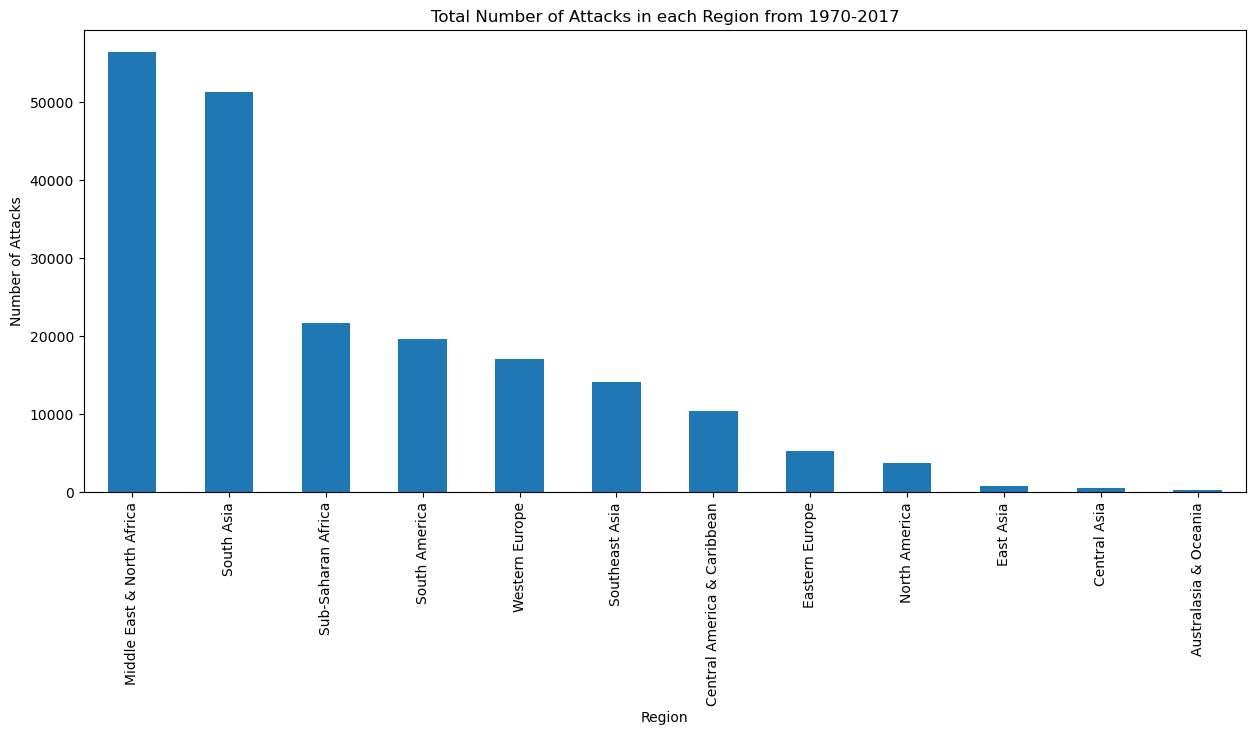

In [24]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

### Most attacks  occurred in Middle East and North Africa

# 4. Killed in each Region

In [27]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,146914.0
South Asia,121322.0
Sub-Saharan Africa,91588.0
South America,29195.0
Central America & Caribbean,28723.0
Southeast Asia,16834.0
Eastern Europe,7468.0
Western Europe,6669.0
North America,5095.0


Text(0, 0.5, 'Number of People Killed')

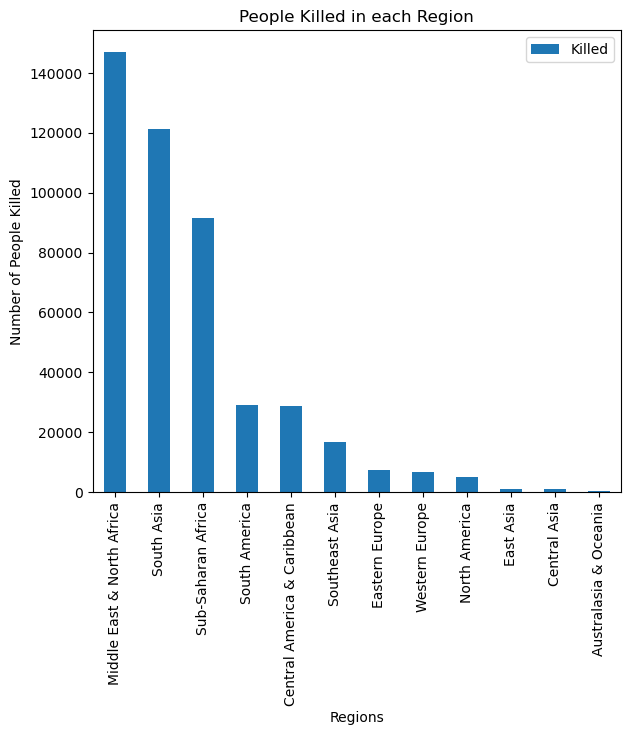

In [30]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

#Killed
rk.plot(kind="bar",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")


### Most people were killed in Middle East and North Africa

# 5. Wounded in each Region

In [34]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,225769.0
South Asia,160537.0
Sub-Saharan Africa,59623.0
Southeast Asia,27927.0
North America,27196.0
Western Europe,18656.0
South America,17364.0
Eastern Europe,12084.0
East Asia,9237.0


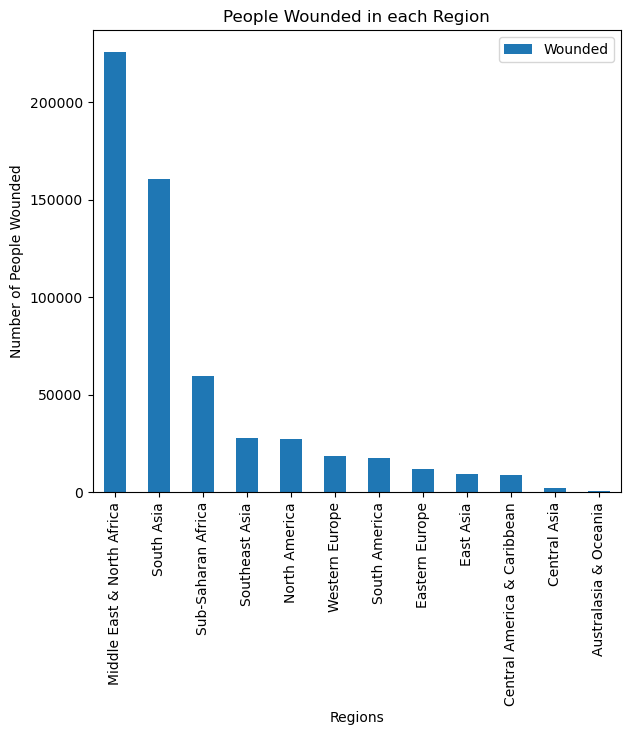

In [93]:
fig=plt.figure()

ax1=fig.add_subplot(1,2,2)

#Wounded
rw.plot(kind="bar",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 3. Country wise Attacks 

In [37]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              26755
Afghanistan       16313
Pakistan          15208
India             13477
Colombia           8742
Philippines        7976
Peru               6109
Yemen              5526
United Kingdom     5424
El Salvador        5320
Name: Country, dtype: int64

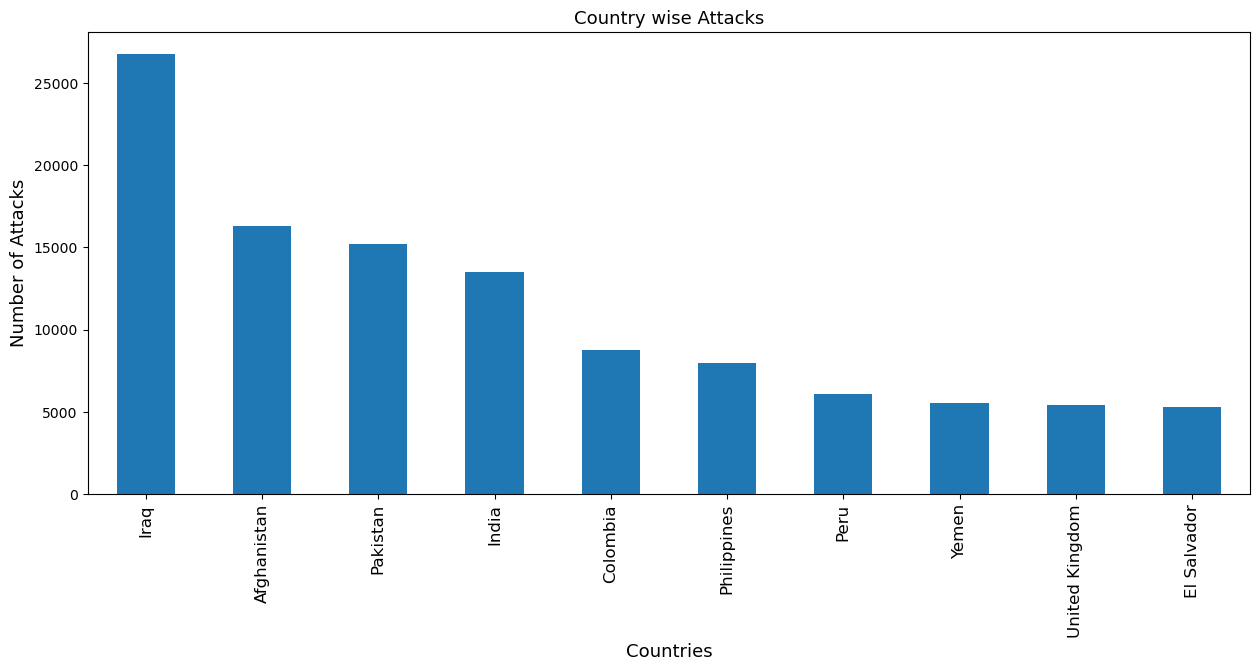

In [38]:
ct.plot(kind="bar",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Most attacks happened in Iraq

# Country wise killed 

In [39]:
count_k=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
count_k.head(10)

,Killed
Country,
Iraq,81019.0
Afghanistan,57453.0
Nigeria,26997.0
Pakistan,24935.0
India,20066.0
Syria,17886.0
Sri Lanka,15588.0
Colombia,14963.0
Peru,12778.0


Text(0, 0.5, 'Number of People Killed')

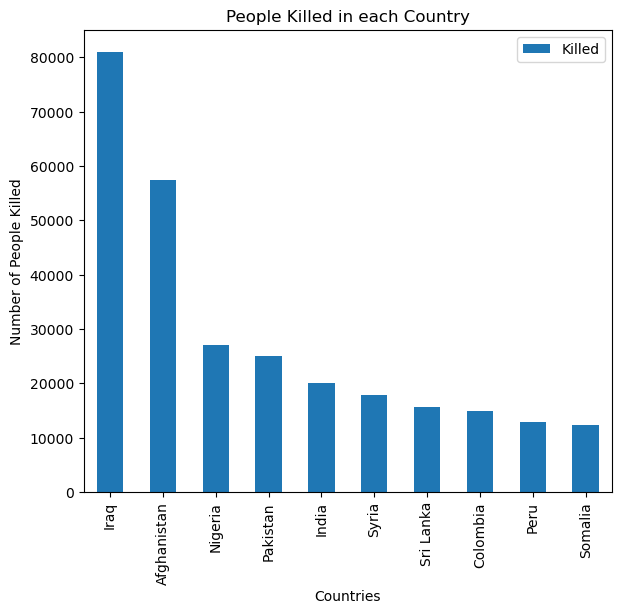

In [41]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

#Killed
count_k[:10].plot(kind="bar",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")


### Mostly people were killed in Iraq

# Country wise wounded

In [42]:
country_w=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
country_w.head(10)

,Wounded
Country,
Iraq,138336.0
Afghanistan,59747.0
Pakistan,44225.0
India,30144.0
United States,26269.0
Syria,16747.0
Sri Lanka,15733.0
Philippines,14404.0
Yemen,12534.0


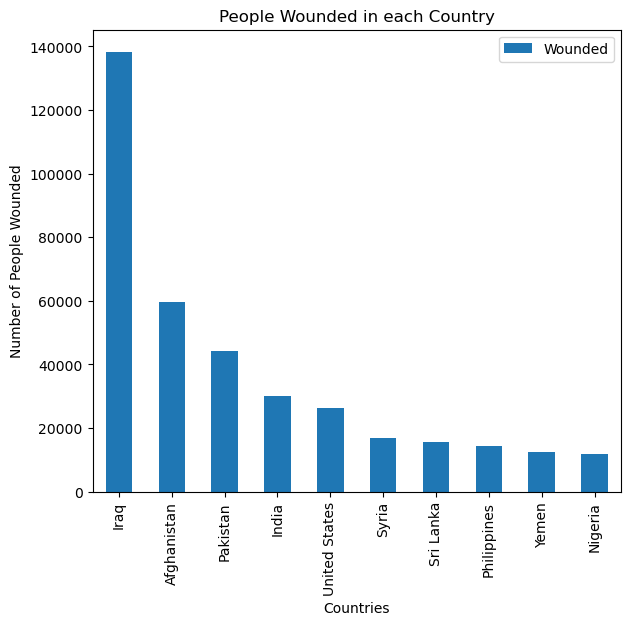

In [94]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)
#Wounded
country_w[:10].plot(kind="bar",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### Most people were wounded in Iraq

# 4. City wise Attacks 

In [50]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7881
Karachi         2698
Lima            2359
Mosul           2326
Belfast         2230
Mogadishu       1885
Santiago        1637
San Salvador    1560
Athens          1059
Istanbul        1056
Name: City, dtype: int64

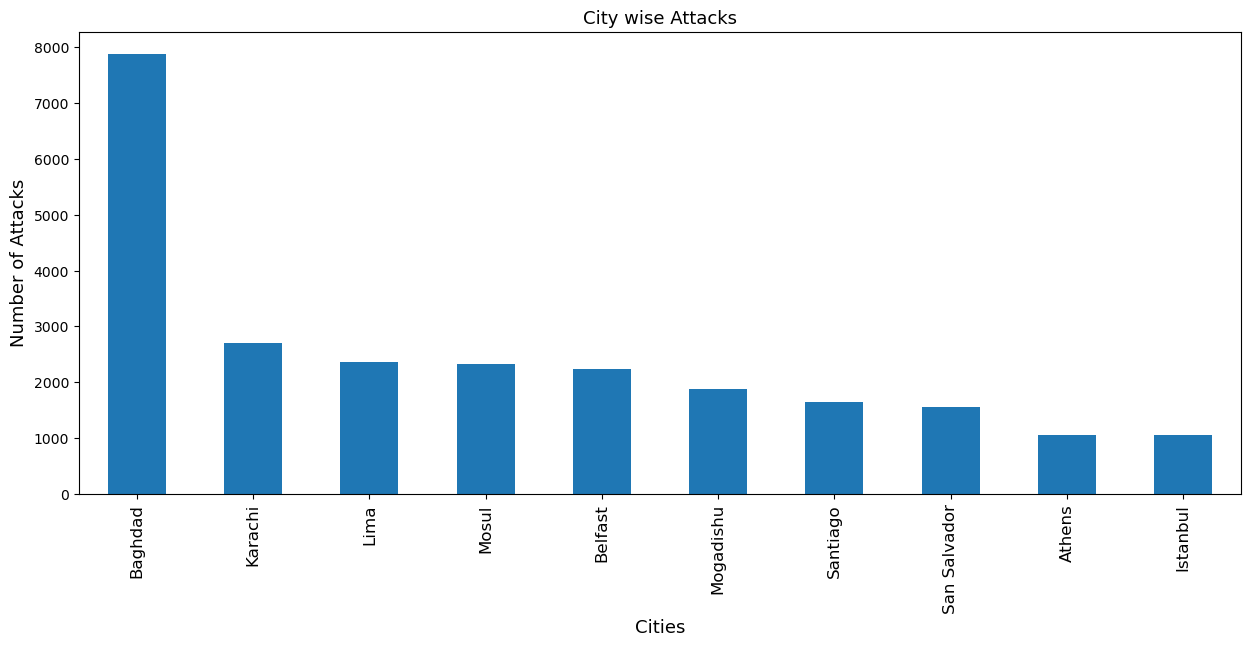

In [56]:
city.plot(kind="bar",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Most attacks happened in Baghdad

# City Wise Killed

In [58]:
city_k=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
city_k.head(10)

,Killed
City,
Baghdad,21395.0
Mosul,7279.0
Mogadishu,4617.0
Karachi,3730.0
Kabul,3537.0
New York City,2844.0
Tikrit,2692.0
Maiduguri,2366.0
Ramadi,2312.0


Text(0, 0.5, 'Number of People Killed')

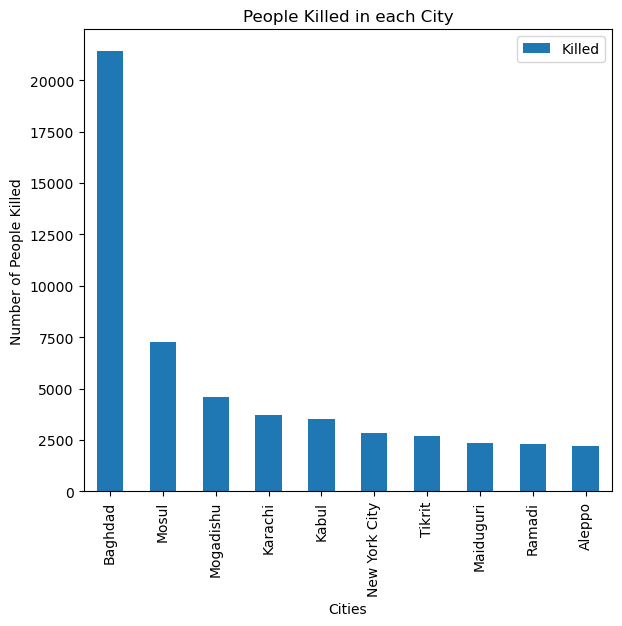

In [61]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
#Killed
city_k[:10].plot(kind="bar",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

### Most people were killed in Baghdad

# City Wise Wounded

In [62]:
city_w=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
city_w.head(10)

,Wounded
City,
Baghdad,57582.0
New York City,22170.0
Kabul,8375.0
Mosul,5971.0
Mogadishu,5905.0
Karachi,5727.0
Tokyo,5550.0
Beirut,5396.0
Kirkuk,5183.0


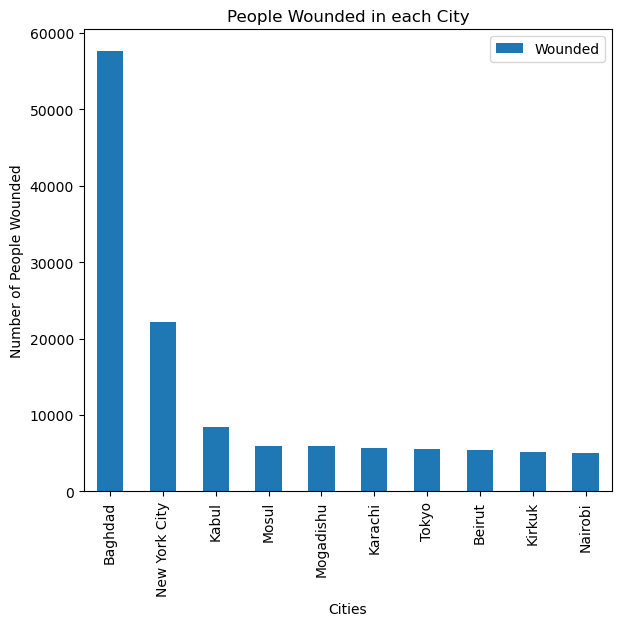

In [64]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

#Wounded
city_w[:10].plot(kind="bar",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### Most people were wounded in Baghdad

# 5. Terrorist Group wise Attacks

In [65]:
group=df["Group Name"].value_counts()[1:10]
group

Taliban                                             10094
Islamic State of Iraq and the Levant (ISIL)          6864
Shining Path (SL)                                    4563
Al-Shabaab                                           4126
Farabundo Marti National Liberation Front (FMLN)     3351
New People's Army (NPA)                              3249
Boko Haram                                           3018
Houthi extremists (Ansar Allah)                      2776
Irish Republican Army (IRA)                          2669
Name: Group Name, dtype: int64

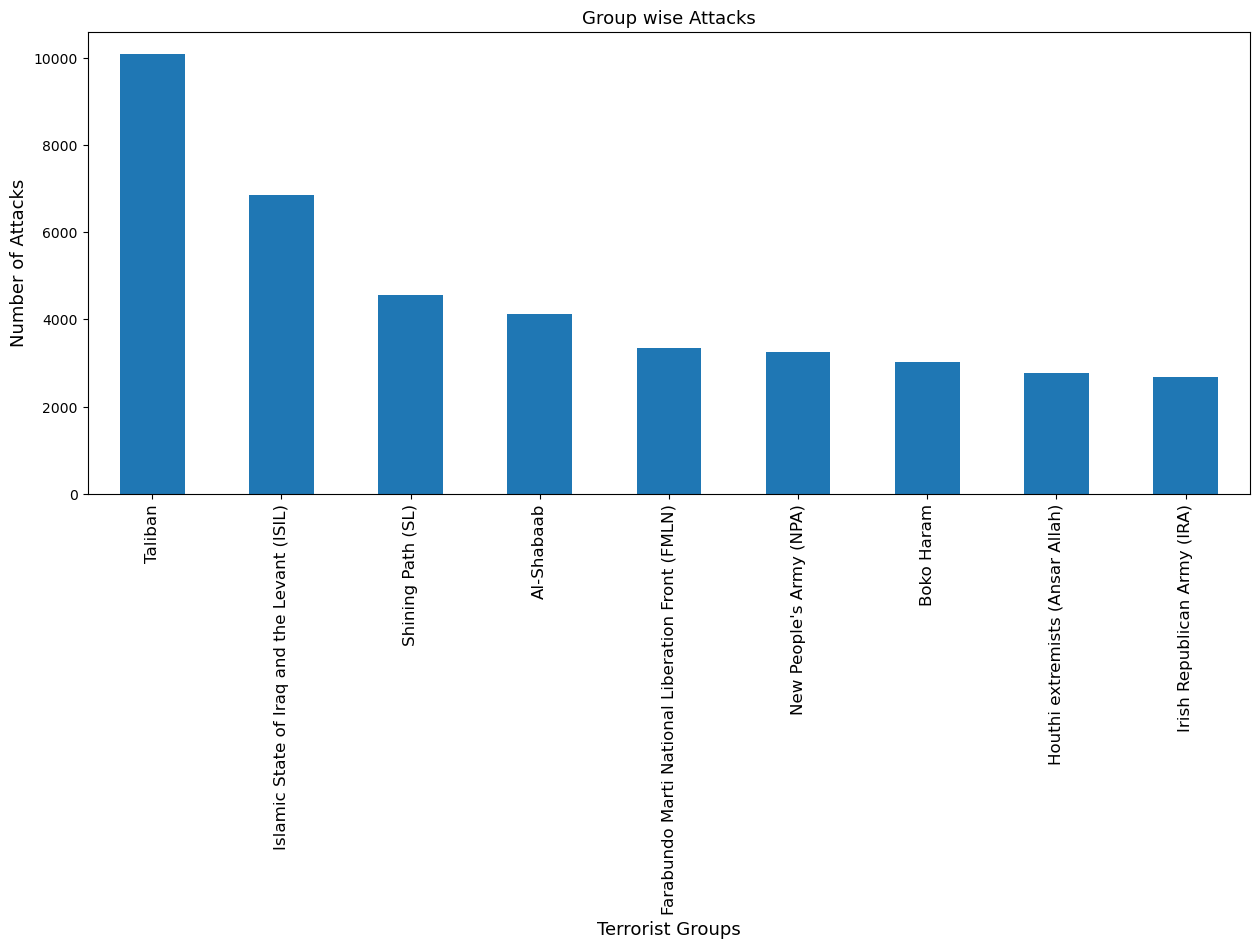

In [66]:
group.plot(kind="bar",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Taliban has caused most number of attacks

# Group wise Killing

In [67]:
group_k=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
group_k.head(10)

,Killed
Group Name,
Taliban,45210.0
Islamic State of Iraq and the Levant (ISIL),42505.0
Boko Haram,23637.0
Shining Path (SL),11608.0
Al-Shabaab,11372.0
Liberation Tigers of Tamil Eelam (LTTE),10778.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6311.0


Text(0, 0.5, 'Number of people Killed')

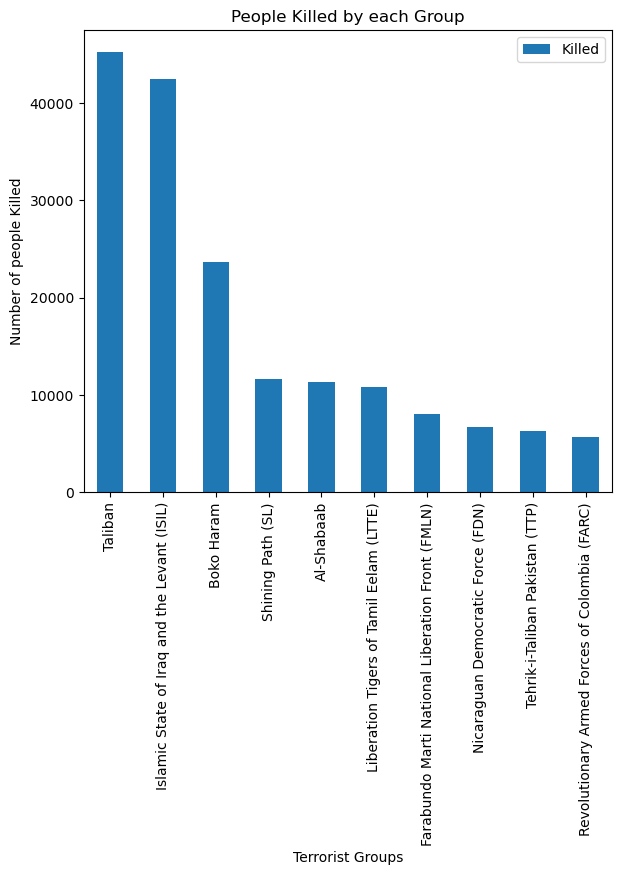

In [70]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

#Killed
group_k[:10].plot(kind="bar",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

### Taliban caused major killing 

# Group wise wounded

In [69]:
group_w=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
group_w.head(10)

,Wounded
Group Name,
Taliban,39113.0
Islamic State of Iraq and the Levant (ISIL),34198.0
Al-Qaida,29890.0
Boko Haram,11014.0
Liberation Tigers of Tamil Eelam (LTTE),10696.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9992.0
Al-Shabaab,9375.0
Aum Shinri Kyo,6003.0


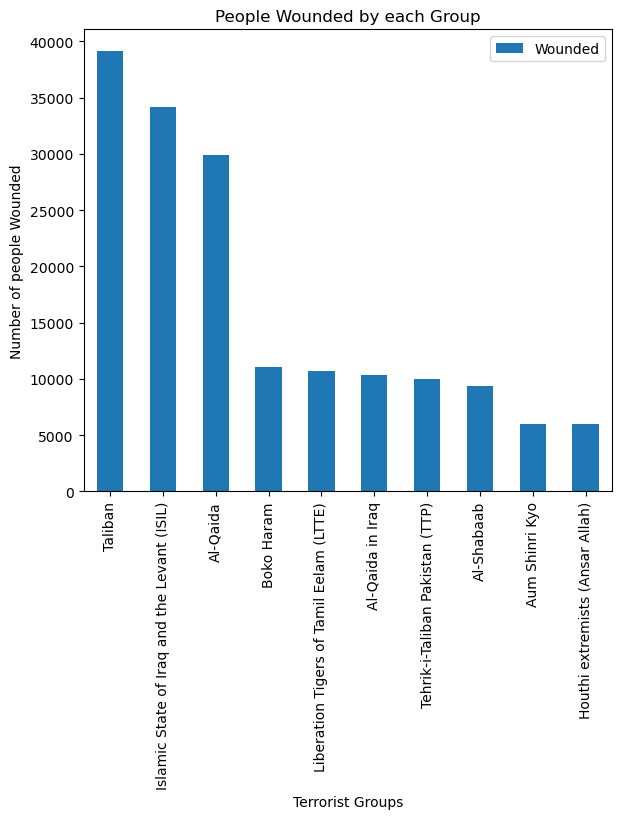

In [73]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)
#Wounded
group_w[:10].plot(kind="bar",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### Taliban group wounded major people

# Attacks from different Attack type

In [74]:
weopen_at=df["Attack Type"].value_counts()
weopen_at

Bombing/Explosion                      95402
Armed Assault                          47419
Assassination                          20897
Hostage Taking (Kidnapping)            13198
Facility/Infrastructure Attack         11636
Unknown                                 9590
Unarmed Assault                         1183
Hostage Taking (Barricade Incident)     1124
Hijacking                                734
Name: Attack Type, dtype: int64

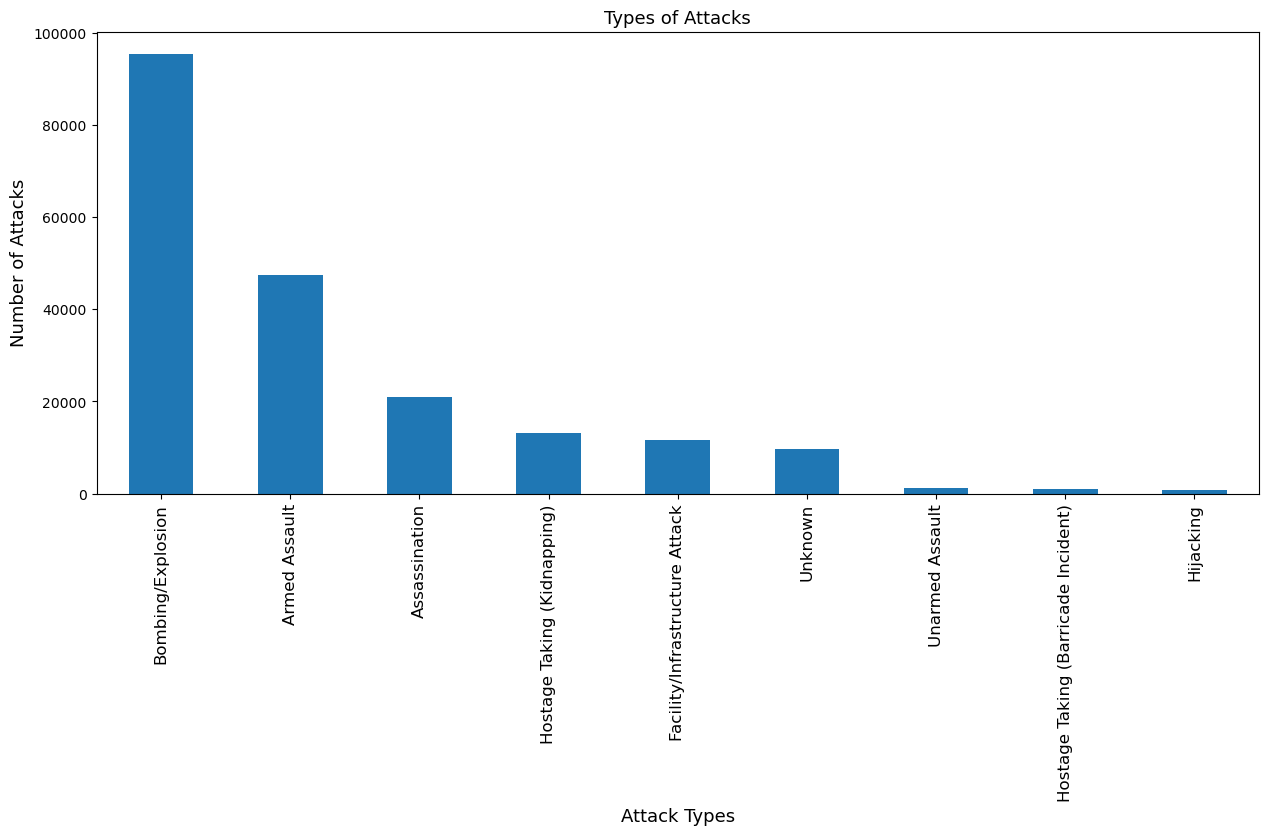

In [76]:
weopen_at.plot(kind="bar",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Bombing And Explosion resulted in major attacks

#  People Killed by different attacks

In [83]:
weopen_k=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
weopen_k

,Killed
Attack Type,
Armed Assault,174916.0
Bombing/Explosion,169961.0
Unknown,42035.0
Hostage Taking (Kidnapping),28816.0
Assassination,26681.0
Hostage Taking (Barricade Incident),4912.0
Facility/Infrastructure Attack,4274.0
Hijacking,3735.0
Unarmed Assault,919.0


Text(0, 0.5, 'Number of people Killed')

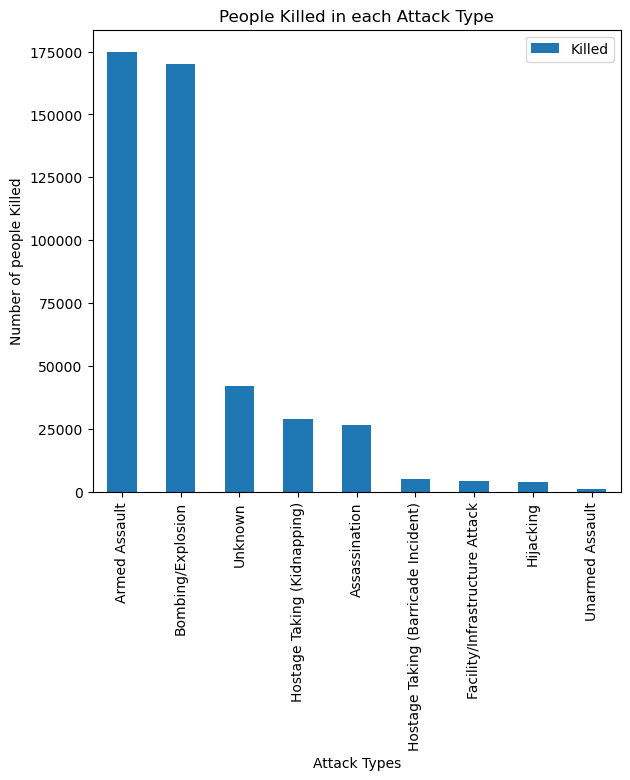

In [79]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

#Killed
weopen_k.plot(kind="bar",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

### Most people were killed by Armed Assault Attack

# People wounded by different attacks

In [80]:
weopen_w=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
weopen_w

,Wounded
Attack Type,
Bombing/Explosion,395150.0
Armed Assault,85621.0
Hijacking,22414.0
Unknown,19732.0
Assassination,15452.0
Unarmed Assault,14678.0
Hostage Taking (Kidnapping),8347.0
Hostage Taking (Barricade Incident),4331.0
Facility/Infrastructure Attack,4018.0


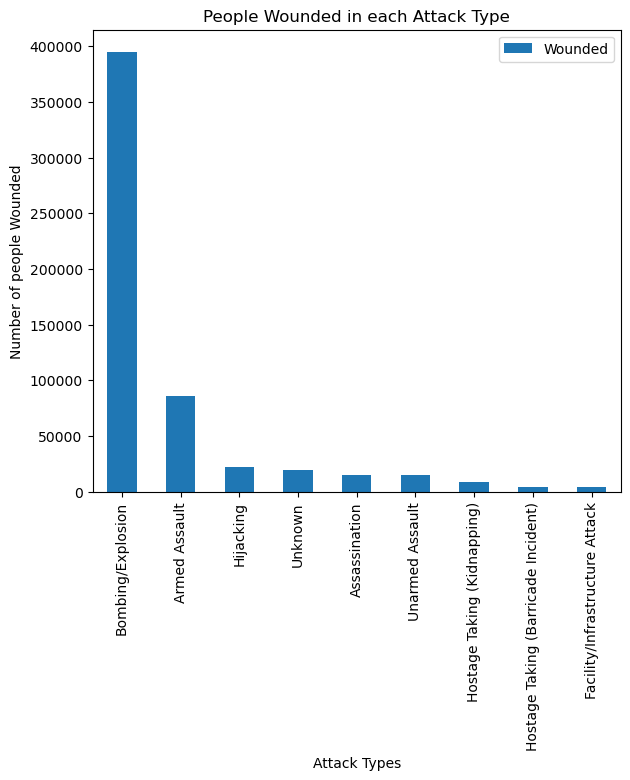

In [82]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

#Wounded
weopen_w.plot(kind="bar",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### Most people were wounded by Bombing/Explosion activities

### 7. Target Type wise Attacks

In [84]:
target_a=df["Target Type"].value_counts()
target_a

Private Citizens & Property       49495
Military                          31998
Police                            27273
Government (General)              23174
Business                          21797
Transportation                     7075
Unknown                            6815
Utilities                          6232
Religious Figures/Institutions     4917
Educational Institution            4658
Government (Diplomatic)            3738
Terrorists/Non-State Militia       3523
Journalists & Media                3213
Violent Political Party            2051
Airports & Aircraft                1395
Telecommunication                  1137
NGO                                1078
Tourists                            455
Maritime                            387
Food or Water Supply                343
Abortion Related                    265
Other                               164
Name: Target Type, dtype: int64

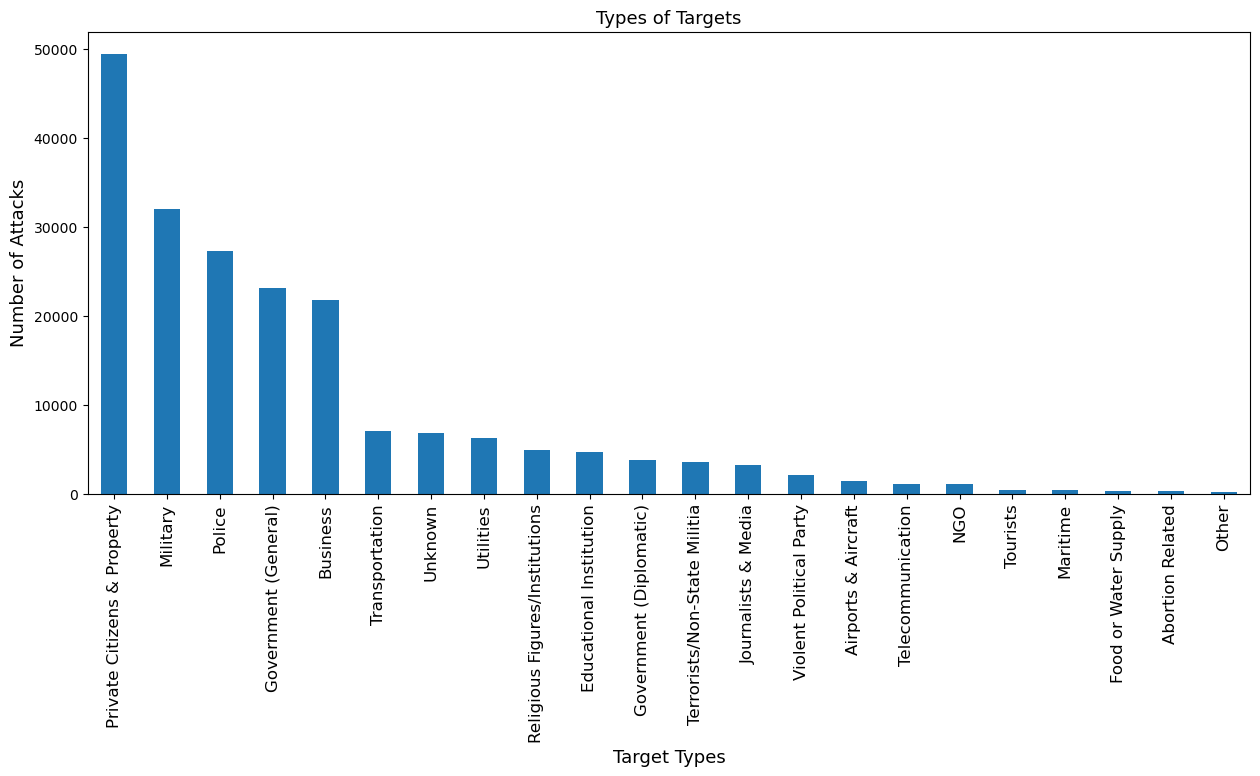

In [85]:
target_a.plot(kind="bar",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Private Citizens And Property were the main targets

# Target Group Killing

In [87]:
target_k=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
target_k

,Killed
Target Type,
Private Citizens & Property,153607.0
Military,119965.0
Police,62271.0
Government (General),28916.0
Business,24904.0
Religious Figures/Institutions,14270.0
Transportation,14238.0
Terrorists/Non-State Militia,10847.0
Unknown,4887.0


Text(0, 0.5, 'Number of people Killed')

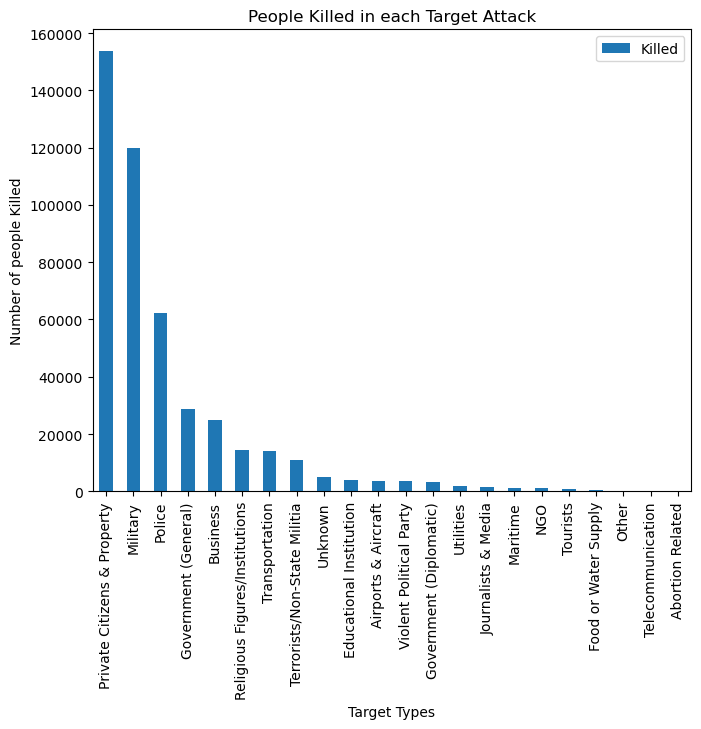

In [88]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

#Killed
target_k.plot(kind="bar",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

### People belonging to Private Citizens and Property were killed majorly

# Target Group Wounded

In [89]:
target_w=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
target_w

,Wounded
Target Type,
Private Citizens & Property,196097.0
Military,80525.0
Police,72327.0
Business,57503.0
Government (General),44575.0
Transportation,41208.0
Religious Figures/Institutions,25897.0
Government (Diplomatic),10966.0
Educational Institution,10650.0


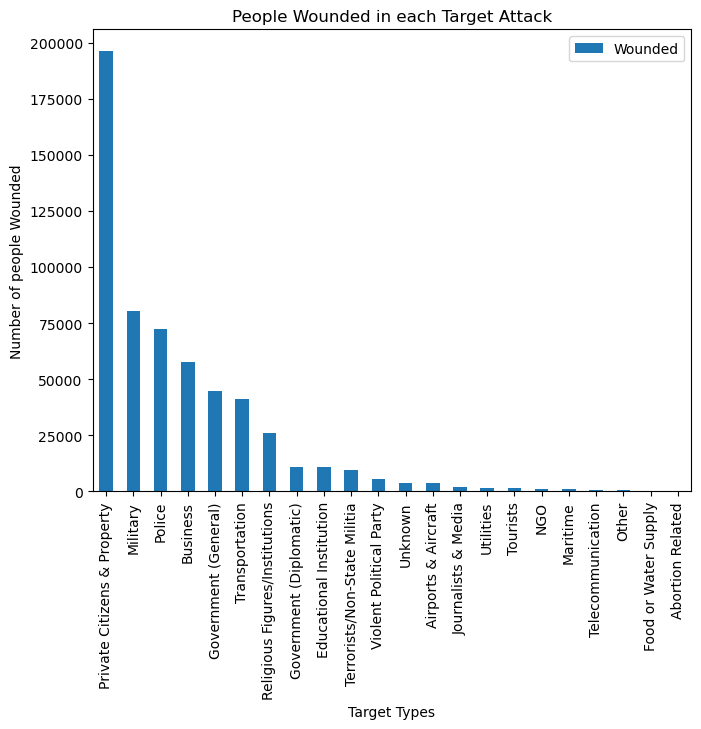

In [90]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)
#Wounded
target_w.plot(kind="bar",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### People related to Private Citizens and Property were wounded majorly

# Observations and Conclusions

**After performing the Exploratory Data Analysis we get the following insights from the data:**

Large number of attacks happened in 2014

Private Citizens and Property were the major target for the terrorist activities

Most of the people were wounded and killed in Middle East Asia and North Africa

Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.

The State and City that was most affected was Baghdad

The most common attack type was Bombing/Explosion

Taliban is a major terrorist group

**Recommendation**

More surveillance is required especially in the Middle East & North African Regions.

Since Private Citizens and Property are being targeted consistently so stronger security should be provided, especially in the dense populated regions.

Strict border policy should be implemented to prevent the movement of explosives between the regions.